In [16]:
from pgmpy.models import MarkovNetwork
import networkx as nx
import itertools
from pgmpy.factors.discrete import DiscreteFactor

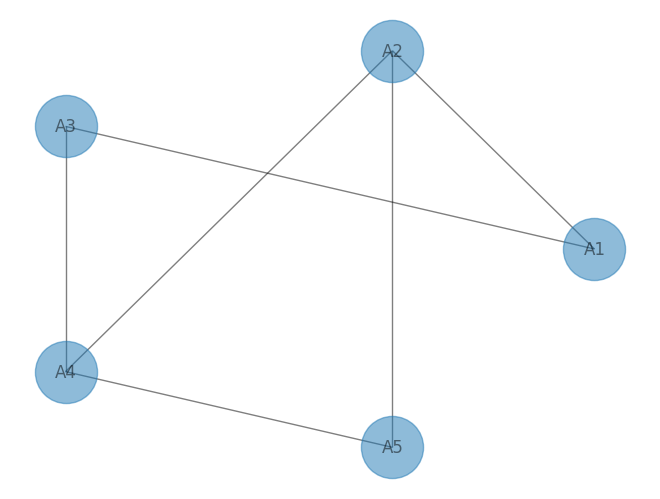

In [2]:

model = MarkovNetwork([
    ('A1', 'A2'),
    ('A1', 'A3'),
    ('A2', 'A4'),
    ('A2', 'A5'),
    ('A3', 'A4'),
    ('A4', 'A5')
])


pos = nx.circular_layout(model)
nx.draw(model, with_labels=True, pos=pos, alpha=0.5, node_size=2000)

In [11]:
clqs = list(nx.find_cliques(model))

for clq in clqs:
    print(clq)

['A4', 'A5', 'A2']
['A4', 'A3']
['A1', 'A2']
['A1', 'A3']


In [48]:
#print(list(itertools.product([-1, 1], repeat = 5)))

def local_function(clq, values):
    perm = list(itertools.product([-1, 1], repeat=len(clq)))
    sums = []
    for p in perm:
        sum = 0
        for i in range(len(p)):
            sum += p[i] * i
        sums.append(sum)
    return [2.71828 ** sum for sum in sums]

binary_values = (-1, 1)
for clq in clqs:
    values = local_function(clq, binary_values)
    factor = DiscreteFactor(
        variables = clq,
        cardinality=[2] * len(clq),
        values = values
        )
    model.add_factors(factor)

model.get_factors()
model.check_model()
model.get_local_independencies()

(A1 ⟂ A5, A4 | A2, A3)
(A2 ⟂ A3 | A5, A4, A1)
(A3 ⟂ A5, A2 | A4, A1)
(A4 ⟂ A1 | A5, A2, A3)
(A5 ⟂ A3, A1 | A4, A2)

In [ ]:
from pgmpy.inference import BeliefPropagation
bp_infer = BeliefPropagation(model)
marginals = bp_infer.map_query(variables=['A1', 'A2', 'A3', 'A4', 'A5'])
print(marginals)


{'A1': 0, 'A2': 1}
